In [2]:
# Importing dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

In [3]:
# Defining Number of classes and image input size
num_classes = 4
image_height, image_width = (224,224)

## Creating our first set of model

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Generating Dataset

In [105]:
# Inputing images using ImageDataGenerator without augmentation to get baseline
datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

def generateTrainValidSets(datagen, filepath):
    trainDataSet = datagen.flow_from_directory(
        target_size=(image_height, image_width),
        directory=r"/content/drive/Othercomputers/New Desktop/NUS ISS/Sem 2/Machine Learning/09 Team Project/" + filepath,
        subset = "training",
        class_mode = "categorical",
        shuffle = True,
        batch_size = 8
    )

    validDataSet = datagen.flow_from_directory(
        target_size=(image_height, image_width),
        directory=r"/content/drive/Othercomputers/New Desktop/NUS ISS/Sem 2/Machine Learning/09 Team Project/" + filepath,
        subset = "validation",
        class_mode = "categorical",
        shuffle = True,
        batch_size = 8
    )

    return trainDataSet, validDataSet

trainDataSet,validDataSet = generateTrainValidSets(datagen, "train_sorted")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/Othercomputers/New Desktop/NUS ISS/Sem 2/Machine Learning/09 Team Project/train_sorted'

In [ ]:
firstmodel = Sequential()

firstmodel.add(Conv2D(64, (2, 2), activation='relu', padding='same', input_shape=(image_height, image_width, 3)))
firstmodel.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
firstmodel.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# Flatten the nodes for the last layer
firstmodel.add(Flatten())
firstmodel.add(Dense(32, activation='relu'))
firstmodel.add(Dense(num_classes, activation='softmax'))

# Compile the model
firstmodel.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:
num_epochs = 30
history = firstmodel.fit(
    trainDataSet,
    steps_per_epoch = trainDataSet.samples // trainDataSet.batch_size,
    epochs = num_epochs,
    validation_data = validDataSet,
    validation_steps = validDataSet.samples // validDataSet.batch_size,
    verbose = 1
)

Saving the model and the history of the first model

In [ ]:
# Saving the first model
# firstmodel.save('/content/drive/Othercomputers/New Desktop/NUS ISS/Sem 2/Machine Learning/09 Team Project/first_model.keras')

In [ ]:
import pickle

In [ ]:
with open('/content/drive/Othercomputers/New Desktop/NUS ISS/Sem 2/Machine Learning/09 Team Project/first_model_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
import matplotlib.pyplot as plt

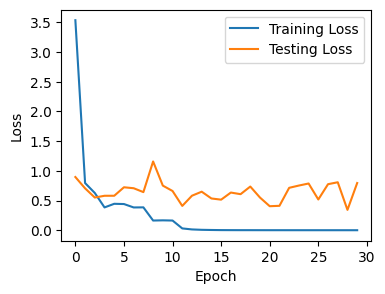

In [ ]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(4, 3))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')

# Set title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

In [33]:
# Preparing the test set data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "test_sorted",
    target_size=(image_height, image_width),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 60 images belonging to 4 classes.


In [ ]:
firstmodel = tf.keras.models.load_model('/content/drive/Othercomputers/New Desktop/NUS ISS/Sem 2/Machine Learning/09 Team Project/first_model.keras')

In [ ]:
firstmodel_trainscore = firstmodel.evaluate(trainDataSet,steps=trainDataSet.samples // trainDataSet.batch_size)
firstmodel_validationscore = firstmodel.evaluate(validDataSet,steps=validDataSet.samples // validDataSet.batch_size)
firstmodel_testscore = firstmodel.evaluate(test_generator,steps=test_generator.samples // test_generator.batch_size)

60/60 [==============================] - 1s 13ms/step - loss: 1.9202 - accuracy: 0.8333


In [ ]:
print("The base model accuracy score for the train: ",firstmodel_trainscore[1])
print("The base model accuracy score for the validation: ",round(firstmodel_validationscore[1],2))
print("======================================================")
print("The base model accuracy score for the validation: ",round(firstmodel_testscore[1],2))


The base model accuracy score for the train:  1.0
The base model accuracy score for the validation:  0.88
The base model accuracy score for the validation:  0.83


As observed from evaluating the accuracy score across the 3 datasets, we notice that the model is overfitted, having a **0.85** score for the test set while having **1.00** for the training set.

# Improving model by including dropouts, maxpooling and regularisation

In [24]:
secondmodel = Sequential()

secondmodel.add(Conv2D(64, (2, 2), activation='relu', padding='same', input_shape=(image_height, image_width, 3)))
secondmodel.add(Dropout(0.25))
secondmodel.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
secondmodel.add(Dropout(0.25))
secondmodel.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
secondmodel.add(MaxPooling2D(pool_size=(2, 2), strides=2))
secondmodel.add(Dropout(0.15))
secondmodel.add(Flatten())
secondmodel.add(Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
secondmodel.add(Dropout(0.25))

secondmodel.add(Dense(num_classes, activation='softmax'))

# Compile the model
secondmodel.compile(optimizer=Adam(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
num_epochs = 75
history = secondmodel.fit(
    trainDataSet,
    steps_per_epoch = trainDataSet.samples // trainDataSet.batch_size,
    epochs = num_epochs,
    validation_data = validDataSet,
    validation_steps = validDataSet.samples // validDataSet.batch_size,
    verbose = 1
)

In [ ]:
# Saving the second model
# secondmodel.save('/content/drive/Othercomputers/New Desktop/NUS ISS/Sem 2/Machine Learning/09 Team Project/improvedmodel.keras')

In [ ]:
secondmodel = tf.keras.models.load_model('/content/drive/Othercomputers/New Desktop/NUS ISS/Sem 2/Machine Learning/09 Team Project/improvedmodel.keras')

In [ ]:
secondmodel_trainscore = secondmodel.evaluate(trainDataSet,steps=trainDataSet.samples // trainDataSet.batch_size)
secondmodel_validationscore = secondmodel.evaluate(validDataSet,steps=validDataSet.samples // validDataSet.batch_size)
secondmodel_testscore = secondmodel.evaluate(test_generator,steps=test_generator.samples // test_generator.batch_size)

60/60 [==============================] - 1s 14ms/step - loss: 0.8283 - accuracy: 0.8667


In [ ]:
print("The base model accuracy score for the train: ",secondmodel_trainscore[1])
print("The base model accuracy score for the validation: ",round(secondmodel_validationscore[1],2))
print("======================================================")
print("The base model accuracy score for the test: ",round(secondmodel_testscore[1],2))


The base model accuracy score for the train:  0.984375
The base model accuracy score for the validation:  0.93
The base model accuracy score for the test:  0.87


Removing outliers

In [8]:
import os
import pandas as pd

In [9]:
UmapwrongImageList = ["train_sorted/banana/banana_61.jpg","train_sorted/apple/apple_3.jpg"]
wrongImageList = ["train_sorted/banana/banana_35.jpg","train_sorted/banana/banana_61.jpg","train_sorted/mixed/mixed_20.jpg"]


In [10]:
train_sort_path = "/content/drive/Othercomputers/New Desktop/NUS ISS/Sem 2/Machine Learning/09 Team Project/train_sorted"

In [11]:
# Excluding outliers
outliers = wrongImageList + UmapwrongImageList

# Creating a dataframe to facilitate the flow_from_dataframe function for the ImageDataGenerator
imagedata = []
row = 0
for classname in os.listdir(train_sort_path):
    classpath = os.path.join(train_sort_path, classname)
    for imagepath in os.listdir(classpath):
        imagerelativepath = os.path.join(classname,imagepath)
        if ("train_sorted/" + imagerelativepath) not in outliers:
            imagedata.append([imagerelativepath, classname])


imagedataframe = pd.DataFrame(data= imagedata, columns=("pathname","class"))

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/Othercomputers/New Desktop/NUS ISS/Sem 2/Machine Learning/09 Team Project/train_sorted'

In [ ]:
imagedataframe.shape

(236, 2)

In [ ]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

cleaned_train_generator = datagen.flow_from_dataframe(
    dataframe=imagedataframe,
    directory=train_sort_path,
    x_col='pathname',
    y_col='class',
    target_size=(image_height, image_width),
    subset='training',
    class_mode='categorical',
    shuffle=True,
    batch_size=8
)

cleaned_validation_generator = datagen.flow_from_dataframe(
    dataframe=imagedataframe,
    directory=train_sort_path,
    x_col='pathname',
    y_col='class',
    target_size=(image_height, image_width),
    subset='validation',
    class_mode='categorical',
    shuffle=True,
    batch_size=8
)


Found 189 validated image filenames belonging to 4 classes.
Found 47 validated image filenames belonging to 4 classes.


In [ ]:
num_epochs = 75
history = secondmodel.fit(
    cleaned_train_generator,
    steps_per_epoch = cleaned_train_generator.samples // cleaned_train_generator.batch_size,
    epochs = num_epochs,
    validation_data = cleaned_validation_generator,
    validation_steps = cleaned_validation_generator.samples // cleaned_validation_generator.batch_size,
    verbose = 1
)

Epoch 1/75
17/23 [=====================>........] - ETA: 18s - loss: 7.1603 - accuracy: 0.3015

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/23 [==============================] - 101s 4s/step - loss: 6.2023 - accuracy: 0.2818 - val_loss: 3.3335 - val_accuracy: 0.0000e+00
Epoch 2/75
23/23 [==============================] - 3s 109ms/step - loss: 3.0428 - accuracy: 0.3812 - val_loss: 2.9360 - val_accuracy: 0.0000e+00
Epoch 3/75
23/23 [==============================] - 3s 117ms/step - loss: 2.4268 - accuracy: 0.3536 - val_loss: 2.3570 - val_accuracy: 0.6750
Epoch 4/75
23/23 [==============================] - 3s 126ms/step - loss: 2.0184 - accuracy: 0.5359 - val_loss: 2.2010 - val_accuracy: 0.0000e+00
Epoch 5/75
23/23 [==============================] - 4s 168ms/step - loss: 1.6853 - accuracy: 0.5635 - val_loss: 2.0278 - val_accuracy: 0.2500
Epoch 6/75
23/23 [==============================] - 3s 128ms/step - loss: 1.6004 - accuracy: 0.5746 - val_loss: 2.0957 - val_accuracy: 0.0250
Epoch 7/75
23/23 [==============================] - 3s 116ms/step - loss: 1.4349 - accuracy: 0.5580 - val_loss: 1.8121 - val_accuracy: 0.0000e+00
Ep

In [ ]:
# Saving the third model
#secondmodel.save('/content/drive/Othercomputers/New Desktop/NUS ISS/Sem 2/Machine Learning/09 Team Project/cleaned_improvedmodel.keras')

In [ ]:
thirdmodel_trainscore = secondmodel.evaluate(cleaned_train_generator,steps=cleaned_train_generator.samples // cleaned_train_generator.batch_size)
thirdmodel_validationscore = secondmodel.evaluate(cleaned_validation_generator,steps=cleaned_validation_generator.samples // cleaned_validation_generator.batch_size)
thirdmodel_testscore = secondmodel.evaluate(test_generator,steps=test_generator.samples // test_generator.batch_size)

60/60 [==============================] - 22s 371ms/step - loss: 0.5322 - accuracy: 0.8833


In [ ]:
print("The base model accuracy score for the train: ",thirdmodel_trainscore[1])
print("The base model accuracy score for the validation: ",round(thirdmodel_validationscore[1],2))
print("======================================================")
print("The base model accuracy score for the test: ",round(thirdmodel_testscore[1],2))


The base model accuracy score for the train:  0.97826087474823
The base model accuracy score for the validation:  0.93
The base model accuracy score for the test:  0.88


In [15]:
train_sort_path = "additional_train_sorted"

### Creating Augmented dataset

In [25]:
# Excluding outliers
outliers = wrongImageList + UmapwrongImageList

# Creating a dataframe to facilitate the flow_from_dataframe function for the ImageDataGenerator
imagedata = []
row = 0
for classname in os.listdir(train_sort_path):
    classpath = os.path.join(train_sort_path, classname)
    for imagepath in os.listdir(classpath):
        imagerelativepath = os.path.join(classname,imagepath)
        if ("train_sorted/" + imagerelativepath) not in outliers:
            imagedata.append([imagerelativepath, classname])


imagedataframe = pd.DataFrame(data= imagedata, columns=("pathname","class"))

In [26]:
# Defining our augmentation parameters
augmenteddatagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [27]:
augmented_train_generator = augmenteddatagen.flow_from_dataframe(
    dataframe=imagedataframe,
    directory=train_sort_path,
    x_col='pathname',
    y_col='class',
    target_size=(image_height, image_width),
    subset='training',
    class_mode='categorical',
    shuffle=True,
    batch_size=16
)

augmented_validation_generator = augmenteddatagen.flow_from_dataframe(
    dataframe=imagedataframe,
    directory=train_sort_path,
    x_col='pathname',
    y_col='class',
    target_size=(image_height, image_width),
    subset='validation',
    class_mode='categorical',
    shuffle=True,
    batch_size=16
)


Found 733 validated image filenames belonging to 4 classes.
Found 183 validated image filenames belonging to 4 classes.


In [32]:
num_epochs = 40
with tf.device('/GPU:0'):
    history = secondmodel.fit(
        augmented_train_generator,
        steps_per_epoch = augmented_train_generator.samples // augmented_train_generator.batch_size,
        epochs = num_epochs,
        validation_data = augmented_validation_generator,
        validation_steps = augmented_validation_generator.samples // augmented_validation_generator.batch_size,
        verbose = 1
    )

Epoch 1/40
45/45 [==============================] - ETA: 0s - loss: 0.8871 - accuracy: 0.7490

C:\Users\calvi\anaconda3\envs\tensorflowgpu\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


45/45 [==============================] - 8s 166ms/step - loss: 0.8871 - accuracy: 0.7490 - val_loss: 1.4797 - val_accuracy: 0.0511
Epoch 2/40
45/45 [==============================] - 8s 169ms/step - loss: 0.8351 - accuracy: 0.7755 - val_loss: 1.3128 - val_accuracy: 0.3920
Epoch 3/40
45/45 [==============================] - 8s 181ms/step - loss: 0.8719 - accuracy: 0.7713 - val_loss: 0.7787 - val_accuracy: 0.8182
Epoch 4/40
45/45 [==============================] - 8s 169ms/step - loss: 0.7491 - accuracy: 0.8201 - val_loss: 0.8744 - val_accuracy: 0.6648
Epoch 5/40
45/45 [==============================] - 8s 169ms/step - loss: 0.7380 - accuracy: 0.8368 - val_loss: 0.8447 - val_accuracy: 0.8352
Epoch 6/40
45/45 [==============================] - 7s 165ms/step - loss: 0.7094 - accuracy: 0.8382 - val_loss: 0.7959 - val_accuracy: 0.8182
Epoch 7/40
45/45 [==============================] - 8s 169ms/step - loss: 0.7096 - accuracy: 0.8438 - val_loss: 0.8711 - val_accuracy: 0.9261
Epoch 8/40
45/45 

In [36]:
# Saving the third model
# secondmodel.save('augmented_improvedmodel.keras')

In [33]:
fourthmodel_trainscore = secondmodel.evaluate(augmented_train_generator,steps=augmented_train_generator.samples // augmented_train_generator.batch_size)
fourthmodel_validationscore = secondmodel.evaluate(augmented_validation_generator,steps=augmented_validation_generator.samples // augmented_validation_generator.batch_size)
fourthmodel_testscore = secondmodel.evaluate(test_generator,steps=test_generator.samples // test_generator.batch_size)

60/60 [==============================] - 1s 9ms/step - loss: 0.8405 - accuracy: 0.8667


In [35]:
print("The base model accuracy score for the train: ",fourthmodel_trainscore[1])
print("The base model accuracy score for the validation: ",round(fourthmodel_validationscore[1],2))
print("======================================================")
print("The base model accuracy score for the test: ",round(fourthmodel_testscore[1],2))


The base model accuracy score for the train:  0.9208333492279053
The base model accuracy score for the validation:  0.97
The base model accuracy score for the test:  0.87


From the score that we have obtained above, we are still seeing overfitting on the training set as compared to the validation and test set. We are going to attempt to improve the model with batch normalisation and increasing the nodes on the layers.


In [ ]:
import os
import re

filepaths = os.listdir("/content/drive/Othercomputers/New Desktop/NUS ISS/Sem 2/Machine Learning/09 Team Project/additional_train_sorted")

pattern = r"^[^_]*"
imagecount = {"apple": 0,"banana": 0,"orange": 0, "mixed": 0}
for classpath in filepaths:
  num_images = os.listdir(filepaths + f"/{classpath}")
  imagecount[classpath] = len(num_images)

mixed


TypeError: ignored

### Fifth model

In [128]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Defining our augmentation parameters
augmenteddatagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

trainingpath = "train_sorted (augmented)"
classes = os.listdir(trainingpath)

num_images_per_class = {
    'apple': 5,
    'banana': 5,
    'orange': 5,
    'mixed': 15 
}

def augment_images(class_name, num_augmented_images):
    class_dir = os.path.join(trainingpath, class_name)
    for file in os.listdir(class_dir):
        if file.endswith(('.png', '.jpg', '.jpeg')):  
            file_path = os.path.join(class_dir, file)
            img = load_img(file_path)
            img_array = img_to_array(img)
            img_array = img_array.reshape((1,) + img_array.shape)

            # Generate and save the augmented images
            i = 0
            for batch in augmenteddatagen.flow(img_array, batch_size=1, save_to_dir=class_dir, save_prefix=class_name, save_format='jpeg'):
                i += 1
                if i >= num_augmented_images:
                    break  # Break after generating the required number of images

In [129]:
# Loop through the classes and augment images
for class_name in classes:
    print(f'Augmenting images for class: {class_name}')
    augment_images(class_name, num_images_per_class[class_name])

Augmenting images for class: apple


c:\Users\calvi\anaconda3\envs\tensorflowgpu\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Augmenting images for class: banana
Augmenting images for class: mixed
Augmenting images for class: orange


In [106]:
import os
import re

filepaths = os.listdir("additional_train_sorted")

imagecount = {"apple": 0,"banana": 0,"orange": 0, "mixed": 0}
for classpath in filepaths:
  num_images = os.listdir("additional_train_sorted/" + classpath)
  imagecount[classpath] = len(num_images)

In [107]:
imagecount

{'apple': 1741, 'banana': 1637, 'orange': 1547, 'mixed': 626}

Using the newly augmented dataset

In [12]:
# Inputing images using ImageDataGenerator without augmentation to get baseline
datagen = ImageDataGenerator(
    validation_split=0.2
)


trainDataSet = trainDataSet = datagen.flow_from_directory(
    target_size=(image_height, image_width),
    directory="train_sorted",
    subset = "training",
    class_mode = "categorical",
    shuffle = True,
    batch_size = 32
)

validDataSet = validDataSet = datagen.flow_from_directory(
    target_size=(image_height, image_width),
    directory="train_sorted",
    subset = "validation",
    class_mode = "categorical",
    shuffle = True,
    batch_size = 32
)




Found 193 images belonging to 4 classes.
Found 47 images belonging to 4 classes.


In [142]:
# Adding batch normalisation to further reduce overfitting
fifthmodel = Sequential()

fifthmodel.add(Conv2D(32, (2, 2), activation='relu', padding='same', input_shape=(image_height, image_width, 3)))
fifthmodel.add(BatchNormalization())
fifthmodel.add(MaxPooling2D(pool_size=(2, 2), strides=2))
fifthmodel.add(Dropout(0.15))
fifthmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
fifthmodel.add(BatchNormalization())
fifthmodel.add(MaxPooling2D(pool_size=(2, 2), strides=2))
fifthmodel.add(Dropout(0.15))
fifthmodel.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
fifthmodel.add(BatchNormalization())
fifthmodel.add(MaxPooling2D(pool_size=(2, 2), strides=2))
fifthmodel.add(Dropout(0.15))


fifthmodel.add(Flatten())

# FC layer
fifthmodel.add(Dense(64, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
fifthmodel.add(Dropout(0.25))

fifthmodel.add(Dense(num_classes, activation='softmax'))

# Compile the model
fifthmodel.compile(optimizer=Adam(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [143]:
num_epochs = 50
with tf.device('/GPU:0'):
    history = fifthmodel.fit(
        trainDataSet,
        steps_per_epoch = trainDataSet.samples // trainDataSet.batch_size,
        epochs = num_epochs,
        validation_data = validDataSet,
        validation_steps = validDataSet.samples // validDataSet.batch_size,
        verbose = 1
    )

Epoch 1/50
40/40 [==============================] - 9s 208ms/step - loss: 7.3948 - accuracy: 0.6913 - val_loss: 8.1914 - val_accuracy: 0.3438
Epoch 2/50
40/40 [==============================] - 8s 198ms/step - loss: 3.5467 - accuracy: 0.8266 - val_loss: 3.4479 - val_accuracy: 0.7344
Epoch 3/50
40/40 [==============================] - 8s 204ms/step - loss: 3.2014 - accuracy: 0.8520 - val_loss: 12.3839 - val_accuracy: 0.4969
Epoch 4/50
40/40 [==============================] - 8s 204ms/step - loss: 2.6139 - accuracy: 0.8536 - val_loss: 2.8720 - val_accuracy: 0.8188
Epoch 5/50
40/40 [==============================] - 8s 205ms/step - loss: 2.1441 - accuracy: 0.8878 - val_loss: 2.4975 - val_accuracy: 0.8875
Epoch 6/50
40/40 [==============================] - 8s 209ms/step - loss: 1.9801 - accuracy: 0.8870 - val_loss: 3.4659 - val_accuracy: 0.8438
Epoch 7/50
40/40 [==============================] - 8s 205ms/step - loss: 1.8899 - accuracy: 0.8807 - val_loss: 2.4780 - val_accuracy: 0.8594
Epoch

In [146]:
fifthhmodel_trainscore = fifthmodel.evaluate(trainDataSet,steps=trainDataSet.samples // trainDataSet.batch_size)
fifthhmodel_validationscore = fifthmodel.evaluate(validDataSet,steps=validDataSet.samples // validDataSet.batch_size)
fifthhmodel_testscore = fifthmodel.evaluate(test_generator,steps=test_generator.samples // test_generator.batch_size)

60/60 [==============================] - 0s 8ms/step - loss: 5.2150 - accuracy: 0.3000


In [145]:
print("The base model accuracy score for the train: ",round(fifthhmodel_trainscore[1],2))
print("The base model accuracy score for the validation: ",round(fifthhmodel_validationscore[1],2))
print("======================================================")
print("The base model accuracy score for the test: ",round(fifthhmodel_testscore[1],2))

The base model accuracy score for the train:  0.99
The base model accuracy score for the validation:  0.97
The base model accuracy score for the test:  0.3


As we can see, the model is doing really badly on test set even after augmenting the images. We attempt to check what are the images that the model is not predicting correct for error analysis

In [41]:
fifthmodel_predictions = fifthmodel.predict(test_generator,steps=test_generator.samples // test_generator.batch_size)

60/60 [==============================] - 1s 10ms/step


In [92]:
def generatePredictionDF(test_generator,model):
    classpredictions = model.predict(test_generator,steps = test_generator.samples // test_generator.batch_size)
    predicted_classes = classpredictions.argmax(axis=1)
    true_classes = test_generator.classes
    checkprediction = predicted_classes != true_classes

    #Generate Pandas Dataframe 
    df = pd.DataFrame({"filepaths": test_generator.filepaths, "trueclass": true_classes,"predicted": predicted_classes ,"Correctly Predicted": checkprediction})
    return df

In [93]:
predictions = generatePredictionDF(test_generator,fifthmodel)

60/60 [==============================] - 1s 10ms/step


In [94]:
predictions

,filepaths,trueclass,predicted,Correctly Predicted
0,test_sorted\apple\apple_77.jpg,0,0,False
1,test_sorted\apple\apple_78.jpg,0,3,True
2,test_sorted\apple\apple_79.jpg,0,1,True
3,test_sorted\apple\apple_80.jpg,0,0,False
4,test_sorted\apple\apple_81.jpg,0,0,False
5,test_sorted\apple\apple_82.jpg,0,0,False
6,test_sorted\apple\apple_83.jpg,0,0,False
7,test_sorted\apple\apple_84.jpg,0,3,True
8,test_sorted\apple\apple_85.jpg,0,0,False
9,test_sorted\apple\apple_86.jpg,0,0,False


We can observe that the orange class is badly predicted

### Sixth Model

We will try to improve the model by increasing the dropout rates and also introduct more CNN layers. We will also reduce the learning rate to make the model make more refined adjustments

In [45]:
# Adding batch normalisation to further reduce overfitting
sixthmodel = Sequential()

sixthmodel.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_height, image_width, 3))) # Increased the kernel size of filter 
sixthmodel.add(BatchNormalization())
sixthmodel.add(MaxPooling2D(pool_size=(2, 2)))
sixthmodel.add(Dropout(0.2)) # Increased Dropout 

sixthmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same')) # Increased the kernel size of filter
sixthmodel.add(BatchNormalization())
sixthmodel.add(MaxPooling2D(pool_size=(2, 2)))
sixthmodel.add(Dropout(0.3)) # Increased Dropout 

sixthmodel.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
sixthmodel.add(BatchNormalization())
sixthmodel.add(MaxPooling2D(pool_size=(2, 2)))
sixthmodel.add(Dropout(0.4)) # Increased Dropout 


sixthmodel.add(Flatten())

# FC layer
sixthmodel.add(Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))  # Increased the number of neurons
sixthmodel.add(Dropout(0.5))

sixthmodel.add(Dense(num_classes, activation='softmax'))

# Compile the model
sixthmodel.compile(optimizer=Adam(learning_rate=0.0001), # Lowering the learning rate
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
# Adding batch normalisation to further reduce overfitting
sixthmodel = Sequential()

sixthmodel.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_height, image_width, 3))) # Increased the kernel size of filter 
sixthmodel.add(BatchNormalization())
sixthmodel.add(MaxPooling2D(pool_size=(2, 2)))
sixthmodel.add(Dropout(0.2)) # Increased Dropout 

sixthmodel.add(Conv2D(32, (3, 3), activation='relu', padding='same')) # Increased the kernel size of filter
sixthmodel.add(BatchNormalization())
sixthmodel.add(MaxPooling2D(pool_size=(2, 2)))
sixthmodel.add(Dropout(0.3)) # Increased Dropout 


sixthmodel.add(Flatten())

# FC layer
sixthmodel.add(Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))  # Increased the number of neurons
sixthmodel.add(Dropout(0.5)) # Increased Dropout

sixthmodel.add(Dense(num_classes, activation='softmax'))

# Compile the model
sixthmodel.compile(optimizer=Adam(learning_rate=0.0001), # Lowered learning rate
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [46]:
# Inputing images using ImageDataGenerator without augmentation to get baseline
datagen = ImageDataGenerator(
    validation_split=0.2
)


trainDataSet = trainDataSet = datagen.flow_from_directory(
    target_size=(image_height, image_width),
    directory="train_sorted",
    subset = "training",
    class_mode = "categorical",
    shuffle = True,
    batch_size = 8 # Reduce batch size
)

validDataSet = validDataSet = datagen.flow_from_directory(
    target_size=(image_height, image_width),
    directory="train_sorted",
    subset = "validation",
    class_mode = "categorical",
    shuffle = True,
    batch_size = 8 # Reduce batch size
)

Found 193 images belonging to 4 classes.
Found 47 images belonging to 4 classes.


In [47]:
num_epochs = 20
with tf.device('/GPU:0'):
    history = sixthmodel.fit(
        trainDataSet,
        steps_per_epoch = trainDataSet.samples // trainDataSet.batch_size,
        epochs = num_epochs,
        validation_data = validDataSet,
        validation_steps = validDataSet.samples // validDataSet.batch_size,
        verbose = 1
    )

Epoch 1/20
24/24 [==============================] - 2s 71ms/step - loss: 2.7935 - accuracy: 0.4324 - val_loss: 1.9475 - val_accuracy: 0.4000
Epoch 2/20
24/24 [==============================] - 2s 62ms/step - loss: 1.6601 - accuracy: 0.5297 - val_loss: 1.5067 - val_accuracy: 0.6500
Epoch 3/20
24/24 [==============================] - 2s 66ms/step - loss: 1.4736 - accuracy: 0.6541 - val_loss: 1.4282 - val_accuracy: 0.6250
Epoch 4/20
24/24 [==============================] - 2s 66ms/step - loss: 1.4630 - accuracy: 0.6595 - val_loss: 1.2117 - val_accuracy: 0.8500
Epoch 5/20
24/24 [==============================] - 2s 66ms/step - loss: 1.2702 - accuracy: 0.7622 - val_loss: 1.1122 - val_accuracy: 0.8250
Epoch 6/20
24/24 [==============================] - 2s 63ms/step - loss: 1.2627 - accuracy: 0.7405 - val_loss: 1.2504 - val_accuracy: 0.8000
Epoch 7/20
24/24 [==============================] - 2s 64ms/step - loss: 1.1310 - accuracy: 0.7865 - val_loss: 1.1532 - val_accuracy: 0.8000
Epoch 8/20
24

In [50]:
sixthmodel_trainscore = sixthmodel.evaluate(trainDataSet,steps=trainDataSet.samples // trainDataSet.batch_size)
sixthmodel_validationscore = sixthmodel.evaluate(validDataSet,steps=validDataSet.samples // validDataSet.batch_size)
sixthmodel_testscore = sixthmodel.evaluate(test_generator,steps=test_generator.samples // test_generator.batch_size)

60/60 [==============================] - 0s 8ms/step - loss: 8.2129 - accuracy: 0.3167


In [51]:
print("The base model accuracy score for the train: ",round(sixthmodel_trainscore[1],2))
print("The base model accuracy score for the validation: ",round(sixthmodel_validationscore[1],2))
print("======================================================")
print("The base model accuracy score for the test: ",round(sixthmodel_testscore[1],2))

The base model accuracy score for the train:  0.97
The base model accuracy score for the validation:  0.85
The base model accuracy score for the test:  0.32
